# Load the data frame

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [8]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [1]:
# Show certain rows

In [9]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


In [10]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [16]:
df[["   TG", "    DATE"]]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


# simple statistics and filtering

In [18]:
df.loc[df["   TG"] !=-9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [21]:
df.loc[df["   TG"] !=-9999]["   TG"].mean()/10

np.float64(6.360787526128467)

In [22]:
df.loc[df["   TG"] !=-9999]["   TG"].max()/10

np.float64(26.2)

In [23]:
df.loc[df["   TG"] !=-9999]["   TG"].min()/10

np.float64(-28.8)

<Axes: >

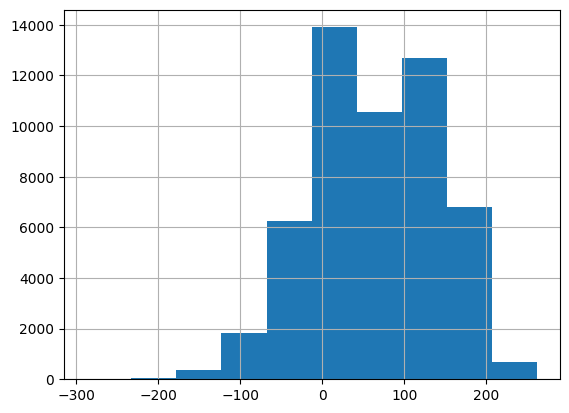

In [27]:
df.loc[df["   TG"] !=-9999]["   TG"].hist()

# Get certain cells

In [30]:
df.loc[df["    DATE"]=="1860-01-05"]

,STAID,SOUID,DATE,TG,Q_TG
4,1,35381,1860-01-05,31,0


# Calculate a new column out of an existing column

In [44]:
import numpy as np
df["TG0"] = df["   TG"].mask(df["   TG"]==-9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0,Fahrenheit
0,1,35381,1860-01-01,21,0,2.1,21.0,69.8
1,1,35381,1860-01-02,46,0,4.6,46.0,114.8
2,1,35381,1860-01-03,31,0,3.1,31.0,87.8
3,1,35381,1860-01-04,37,0,3.7,37.0,98.6
4,1,35381,1860-01-05,31,0,3.1,31.0,87.8
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,NaN,NaN


In [47]:
df["TG"] = df["TG0"] / 10

In [48]:
df["TG"]

0        2.1
1        4.6
2        3.1
3        3.7
4        3.1
        ... 
59316    NaN
59317    NaN
59318    NaN
59319    NaN
59320    NaN
Name: TG, Length: 59321, dtype: float64

In [42]:
df["Fahrenheit"] = df["TG0"] * 9/5 + 32

# plotting

<Axes: >

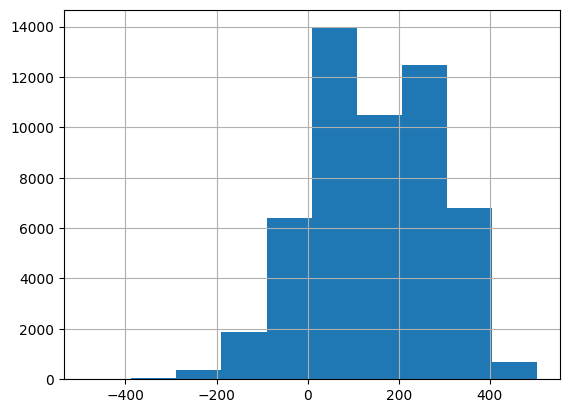

In [50]:
df["Fahrenheit"].hist()

<Axes: xlabel='    DATE'>

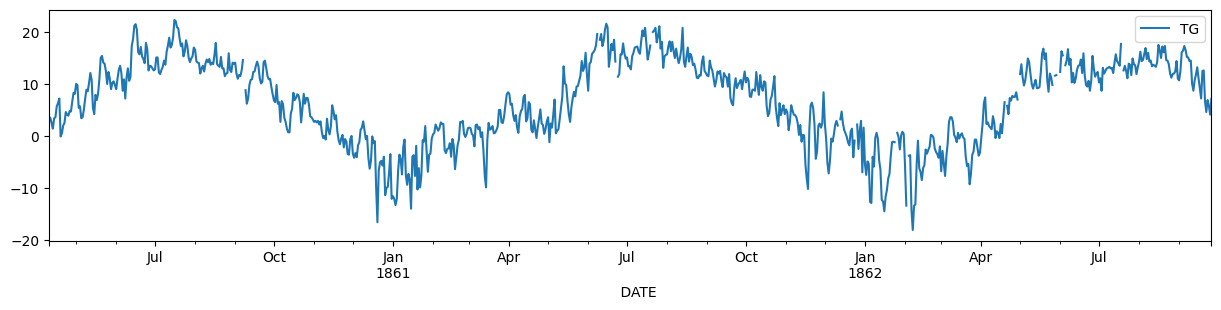

In [52]:
df[100:1000].plot(x="    DATE", y="TG", figsize=(15,3))